# Example TinyImagenet 200

## (i) Import libraries

In [5]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt

import visualization

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

['/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2tiny/run0_width_2_t_8_conv/checkpoints/records.pkl']
['/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2tiny/run0_width_2_t_8_conv/checkpoints/model.pth']


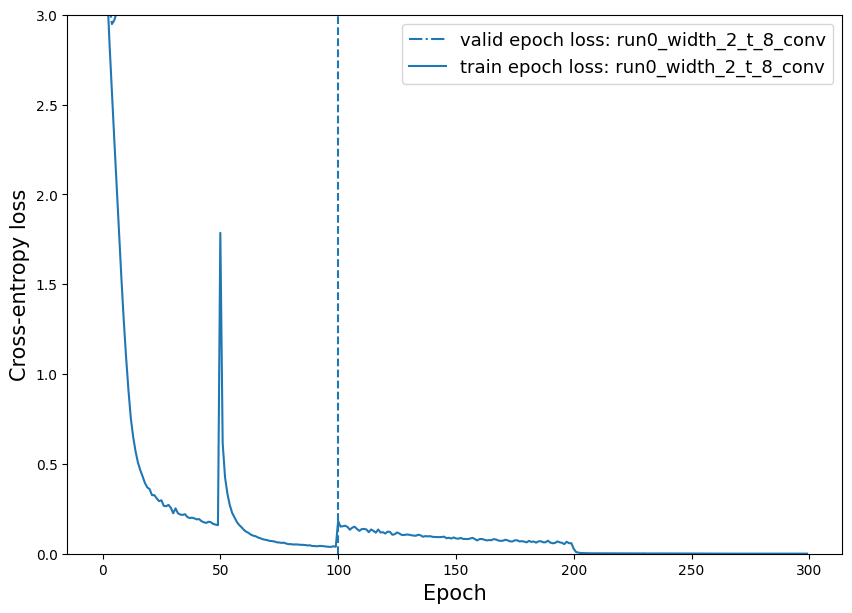

run0_width_2_t_8_conv: test accuracy = 32.099998474121094


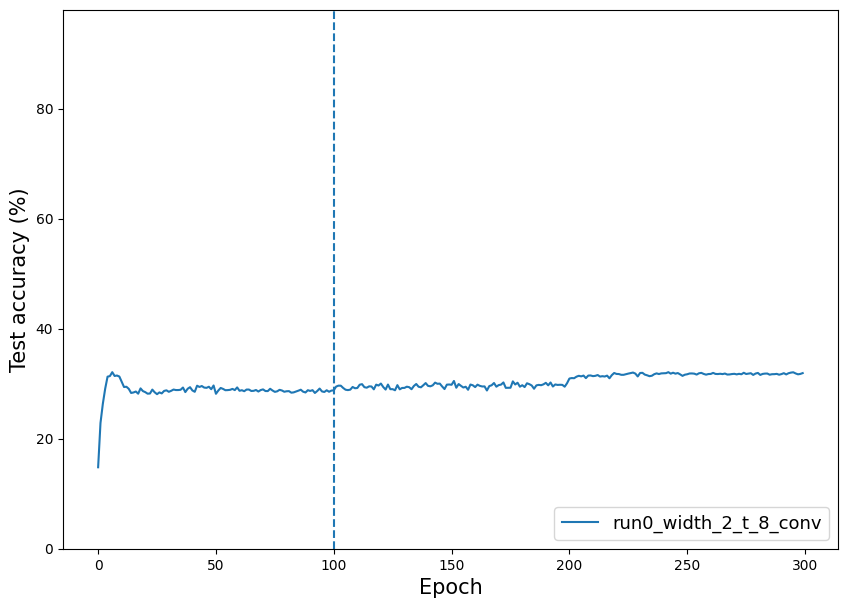

In [7]:
%matplotlib inline

# exp_dir = '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2/'
exp_dir = '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2tiny/'
# models_list = ["debug"]
# models_list = ["run0_width_1.4_t_6", "run0_width_2_t_8"]
models_list = ["run0_width_2_t_8_conv"]

records_file_list = [exp_dir + model_name + '/checkpoints/records.pkl' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

print(records_file_list)
print(model_files)

visualization.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualization.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

## (iii) Compute model size

In [8]:
_ = visualization.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: run0_width_2_t_8_conv
Number of parameters summary:
    Total: 2309777 
    Max per branch: 2309777 
    Min per branch: 2309777 
    Average per branch: 2309777.0


In [9]:
from models import Tree
from utils import load_tree_model
import ptflops

# model_path = '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2/run0_width_1.4_t_6/checkpoints/model.pth'
# model_path = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2/run0_width_2_t_8/checkpoints/model.pth"
model_path = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2tiny/run0_width_2_t_8_conv/checkpoints/model.pth"
model = load_tree_model(model_path)


flops, params = ptflops.get_model_complexity_info(model, (3, 32, 32), as_strings=True, print_per_layer_stat=True)
print('Flops:  ' + flops)
print('Params: ' + params)

Tree(
  3.13 M, 100.000% Params, 21.45 MMac, 100.000% MACs, 
  (tree_modules): ModuleList(
    3.13 M, 100.000% Params, 21.45 MMac, 100.000% MACs, 
    (0): Sequential(
      3.13 M, 100.000% Params, 21.45 MMac, 100.000% MACs, 
      (transform): Root_MBV2tiny(
        2.23 M, 71.074% Params, 21.37 MMac, 99.608% MACs, 
        (features): Sequential(
          2.23 M, 71.074% Params, 21.37 MMac, 99.608% MACs, 
          (0): Sequential(
            928, 0.030% Params, 245.76 KMac, 1.146% MACs, 
            (0): Conv2d(864, 0.028% Params, 221.18 KMac, 1.031% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
            (1): BatchNorm2d(64, 0.002% Params, 16.38 KMac, 0.076% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(0, 0.000% Params, 8.19 KMac, 0.038% MACs, inplace=True)
          )
          (1): InvertedResidual(
            896, 0.029% Params, 237.57 KMac, 1.108% MACs, 
            (conv): Sequential(
    

/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/examples/../models.py:1810: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
